# Influence Simulation for Scale Free Networks

We consider the following undirected graphs for simulating influence networks and cascades.

    barabasi_albert_graph - Scale-Free Network/Power Law Degree Distribution

### Packages

In [1]:
from SimulationHelper import *
from tqdm import tqdm
import numpy as np
import os
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
## Multiprocessing Package - Speed up simulation
from multiprocessing import cpu_count
from dask.distributed import Client, progress
import dask
client = Client(threads_per_worker=2)
client

/home/michael/miniconda3/envs/dask/lib/python3.7/site-packages/distributed/dashboard/core.py:79: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


Client Scheduler: tcp://127.0.0.1:41771 Dashboard: http://127.0.0.1:39293/status,Cluster Workers: 8 Cores: 16 Memory: 33.60 GB


## Simulation of Influentials in a Scale-Free Network

The following code is for simulating and measuring the cascade of influentials 
for a Scale-Free Network using the Preferential Attachment Model.

In [3]:
######################################################################
############################# Parameters #############################
######################################################################

N = 100
phi = 0.18
num_simulations = 100
max_n_avg = 36   # Must be an integer
increment = 1   # Must be an integer

n_avg = [x for x in range(1,max_n_avg+1,increment)]
n = len(n_avg)

In [4]:
%%time
pool = []
for i in tqdm(range(num_simulations)):
    for j in range(n):
        pool.append(dask.delayed(run_simulation_SF)(N,n_avg[j], phi=phi))

results = dask.compute(pool)

100%|██████████| 10/10 [00:00<00:00, 662.93it/s]


CPU times: user 42.1 s, sys: 4.71 s, total: 46.8 s
Wall time: 10min 2s


In [ ]:
%%time

for phi in [0.05, 0.10, 0.18, 0.2, 0.25, 0.5]:
    pool = []
    x = []
    for i in tqdm(range(num_simulations)):
        for j in range(n):
            pool.append(dask.delayed(run_simulation_RG)(N, p[j], phi))

    results = dask.compute(pool)
    tmp = np.array(results[0])

    file_dir = "./Results"
    file_name = "RG_N{}phi{}avg{}sim{}inc{}.npy".format(N,int(phi*100),max_n_avg,num_simulations, increment)
    file_path = os.path.join(file_dir, file_name)

    if not os.path.exists(file_dir):
        os.makedirs(file_dir)
    np.save(file_path, tmp)

### Post Processing

This code reformats the simulation output for plotting.

In [5]:
tmp = np.array(results[0])
dims = (num_simulations, n)
names = ["0-5", "5-10", "10-15", "15-20", "0-10", "0-15", "0-20", "Normal", "95-100"]

s_05, s_10, s_15, s_20 =  np.reshape(tmp[:,0], dims),  np.reshape(tmp[:,1], dims),  np.reshape(tmp[:,2], dims),  np.reshape(tmp[:,3], dims)
s_010, s_015, s_020, s_n, s_95 = np.reshape(tmp[:,4], dims), np.reshape(tmp[:,5], dims),  np.reshape(tmp[:,6], dims),  np.reshape(tmp[:,7], dims),  np.reshape(tmp[:,8], dims)

t_05, t_10, t_15, t_20 = np.reshape(tmp[:,9], dims),  np.reshape(tmp[:,10], dims),  np.reshape(tmp[:,11], dims),  np.reshape(tmp[:,12], dims)
t_010, t_015, t_020, t_n, t_95 = np.reshape(tmp[:,13], dims), np.reshape(tmp[:,14], dims),  np.reshape(tmp[:,15], dims),  np.reshape(tmp[:,16], dims), np.reshape(tmp[:,17], dims)

In [6]:
# Number of Nodes of Network Influenced
S_05, S_10, S_15, S_20 =  np.apply_along_axis(np.mean, 0, s_05), np.apply_along_axis(np.mean, 0, s_10), np.apply_along_axis(np.mean, 0, s_15), np.apply_along_axis(np.mean, 0, s_20)
S_010, S_015, S_020, S_n, S_95 = np.apply_along_axis(np.mean, 0, s_010), np.apply_along_axis(np.mean, 0, s_015), np.apply_along_axis(np.mean, 0, s_020), np.apply_along_axis(np.mean, 0, s_n), np.apply_along_axis(np.mean, 0, s_95)

# Proportion of Network Influenced
N_05, N_10, N_15, N_20 =  [x/N for x in S_05], [x/N for x in S_10], [x/N for x in S_15], [x/N for x in S_20]
N_010, N_015, N_020, N_n, N_95 = [x/N for x in S_010], [x/N for x in S_015], [x/N for x in S_020], [x/N for x in S_n], [x/N for x in S_95]

# Averaged Time of Influenced Nodes
T_05, T_10, T_15, T_20 =  np.apply_along_axis(np.mean, 0, t_05), np.apply_along_axis(np.mean, 0, t_10), np.apply_along_axis(np.mean, 0, t_15), np.apply_along_axis(np.mean, 0, t_20)
T_010, T_015, T_020, T_n, T_95 = np.apply_along_axis(np.mean, 0, t_010), np.apply_along_axis(np.mean, 0, t_015), np.apply_along_axis(np.mean, 0, t_020), np.apply_along_axis(np.mean, 0, t_n), np.apply_along_axis(np.mean, 0, t_95)

### Plotting

The below plots represent 

- Comparison of (average) number of nodes influenced by influential/normal nodes as average degree changes
- Comparison of (average) percentage of nodes influenced by influential/normal nodes as average degree changes
- Comparison of (average) time of node influence by influential/normal nodes as average degree changes


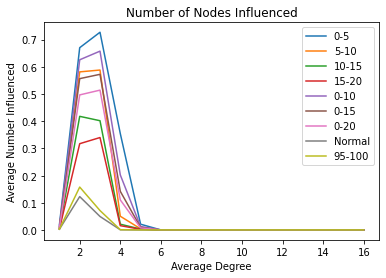

In [7]:
plt.plot(n_avg, N_05)
plt.plot(n_avg, N_10)
plt.plot(n_avg, N_15)
plt.plot(n_avg, N_20)
plt.plot(n_avg, N_010)
plt.plot(n_avg, N_015)
plt.plot(n_avg, N_020)
plt.plot(n_avg, N_n)
plt.plot(n_avg, N_95)
plt.ylabel("Average Number Influenced")
plt.xlabel("Average Degree")
plt.title("Number of Nodes Influenced")
plt.legend(names)

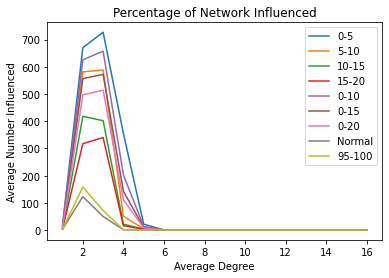

In [8]:
plt.plot(n_avg, S_05)
plt.plot(n_avg, S_10)
plt.plot(n_avg, S_15)
plt.plot(n_avg, S_20)
plt.plot(n_avg, S_010)
plt.plot(n_avg, S_015)
plt.plot(n_avg, S_020)
plt.plot(n_avg, S_n)
plt.plot(n_avg, S_95)
plt.ylabel("Average Number Influenced")
plt.xlabel("Average Degree")
plt.title("Percentage of Network Influenced")
plt.legend(names)

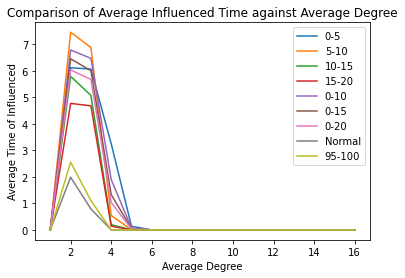

In [9]:
plt.plot(n_avg, T_05)
plt.plot(n_avg, T_10)
plt.plot(n_avg, T_15)
plt.plot(n_avg, T_20)
plt.plot(n_avg, T_010)
plt.plot(n_avg, T_015)
plt.plot(n_avg, T_020)
plt.plot(n_avg, T_n)
plt.plot(n_avg, T_95)
plt.ylabel("Average Time of Influenced")
plt.xlabel("Average Degree")
plt.title("Comparison of Average Influenced Time against Average Degree")
plt.legend(names)

### Storing Simulation Results

Raw simulation results are stored as npy files.

In [10]:
file_dir = "./Results"
file_name = "SF_N{}phi{}avg{}sim{}inc{}.npy".format(N,int(phi*100),max_n_avg,num_simulations, increment)
file_path = os.path.join(file_dir, file_name)

if not os.path.exists(file_dir):
    os.makedirs(file_dir)
np.save(file_path, tmp)

In [ ]:
np.load(file_path)